# Análisis de componentes principales

¡Discutamos PCA! Como no se trata exactamente de un algoritmo completo de aprendizaje automático, sino de un algoritmo de aprendizaje no supervisado, tenemos un ejemplo sobre este tema, pero no un proyecto completo de aprendizaje automático (aunque analizaremos el conjunto de cáncer con PCA).

## PCA (Análisis de Componentes Principales)

Recuerde que PCA es solo una transformación de sus datos e intenta descubrir qué características explican la mayor variación en sus datos. Por ejemplo:

<img src='PCA.png' />

## Librerias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Los datos

Trabajemos de nuevo con el conjunto de datos sobre el cáncer ya que tenía muchas características.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualización PCA

Como hemos notado antes es difícil visualizar datos altamente dimensionales, podemos usar PCA para encontrar los dos primeros componentes principales, y visualizar los datos en este nuevo espacio bidimensional con un único diagrama de dispersión. Sin embargo, antes de hacer esto, necesitaremos escalar nuestros datos para que cada característica tenga una única unidad de varianza.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

PCA con Scikit Learn utiliza un proceso muy similar a otras funciones de preprocesamiento que vienen con SciKit Learn. Instalamos un objeto PCA, buscamos los componentes principales usando el método fit, luego aplicamos la reducción de rotación y dimensionalidad llamando a transform ().

También podemos especificar cuántos componentes queremos conservar al crear el objeto PCA.

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

Ahora podemos transformar estos datos en sus primeros 2 componentes principales.

In [15]:
X_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(569, 30)

In [17]:
X_pca.shape

(569, 2)

¡Estupendo! ¡Hemos reducido 30 dimensiones a solo 2! ¡Grafiquemos estas dos dimensiones!

Text(0, 0.5, 'Segundo Componente Principal')

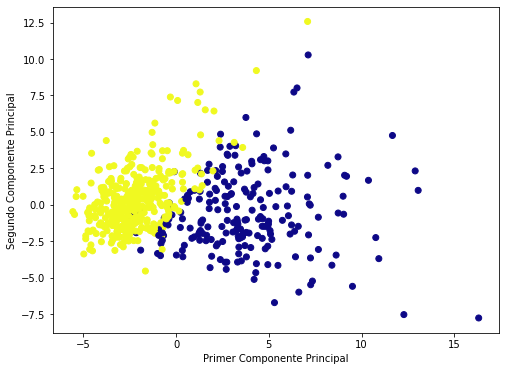

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

Claramente, al utilizar estos dos componentes, podemos separar fácilmente estas dos clases.

## Interpretación de los componentes

Desafortunadamente, con este gran poder de reducción de dimensionalidad, viene el costo de poder entender fácilmente lo que representan estos componentes.

Los componentes corresponden a combinaciones de las características originales, los componentes mismos se almacenan como un atributo del objeto PCA ajustado:

In [20]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

En esta matriz numpy, cada fila representa un componente principal, y cada columna se relaciona con las características originales. podemos visualizar esta relación con un mapa de calor:

In [23]:
df_comp = pd.DataFrame(pca.components_,
                       index=['PC1','PC2'],columns=cancer['feature_names'])

In [24]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

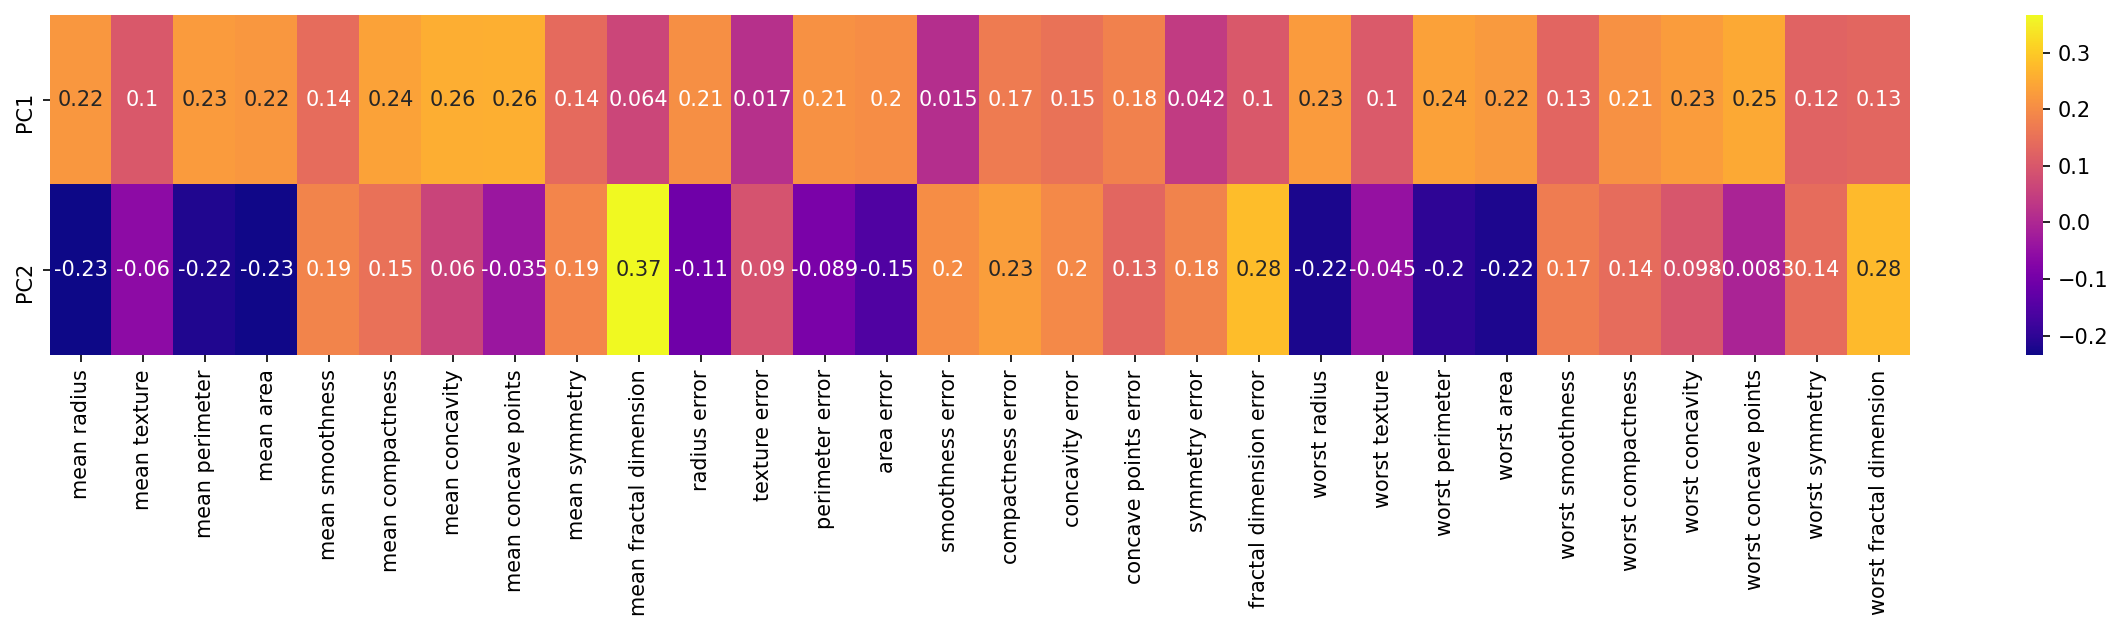

In [26]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,cmap='plasma',annot=True)

Este mapa de calor y la barra de color básicamente representan la correlación entre las diversas características y el componente principal en sí.

In [27]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [28]:
np.sum(pca.explained_variance_ratio_)

0.632432076515594

In [29]:
pca_30 = PCA(n_components=30)
pca_30.fit(scaled_data)

PCA(n_components=30)

In [30]:
pca_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [32]:
np.sum(pca_30.explained_variance_ratio_)

1.0

In [36]:
varianza_explicada = []
for n in range(1,31):
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    
    varianza_explicada.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varianza Explicada')

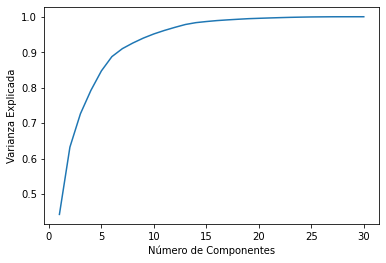

In [37]:
plt.plot(range(1,31),varianza_explicada)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')

## Conclusión

Esperamos que esta información sea útil para usted cuando se trata de datos de alta dimensión.

# ¡Buen trabajo!